In [147]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import numpy as np
import scipy.sparse as sp


In [148]:


def laplacian_grid_square(n):
    """
    Create the Laplacian matrix for an n x n grid using finite difference method.
    :param n: Grid size (n x n)
    :return: Sparse Laplacian matrix of shape (n^2, n^2)
    """
    
    size = n * n
    diagonals = []
    
    # Main diagonal (-4)
    diagonals.append(-4 * np.ones(size))
    
    # Right and left neighbor diagonals (+1)
    diagonals.append(np.ones(size - 1))
    diagonals.append(np.ones(size - 1))
    
    # Top and bottom neighbor diagonals (+1)
    diagonals.append(np.ones(size - n))
    diagonals.append(np.ones(size - n))
    
    # Convert to sparse matrix
    offsets = [0, 1, -1, n, -n]
    L = sp.diags(diagonals, offsets, shape=(size, size), format='csr')
    
    # Fix row edges (remove horizontal connections between rows)
    for i in range(1, n):
        L[i * n, i * n - 1] = 0
        L[i * n - 1, i * n] = 0
 
   
    
    return L

# Example usage:
n = 4
laplacian = laplacian_grid_square(n)
print(laplacian.toarray())
np.savetxt("sqaure_laplacian_grid.txt", laplacian.toarray(), fmt="%.2f", header="Laplacian Matrix for n x n Grid", comments="")


[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4. 

In [149]:


def laplacian_grid(n):
    """
    Create the Laplacian matrix for an n x 2n grid using finite difference method.
    :param n: Grid height
    :return: Sparse Laplacian matrix of shape (2n*n, 2n*n)
    """
    n = n -2
    m = 2 * n  # Grid width
    size = n * m
    print(size)
    diagonals = []
    
    # Main diagonal (-4)
    diagonals.append(-4 * np.ones(size))
    
    # Right and left neighbor diagonals (+1)
    diagonals.append(np.ones(size - 1))
    diagonals.append(np.ones(size - 1))
    
    # Top and bottom neighbor diagonals (+1)
    diagonals.append(np.ones(size - m))
    diagonals.append(np.ones(size - m))
    
    # Convert to sparse matrix
    offsets = [0, 1, -1, m, -m]
    L = sp.diags(diagonals, offsets, shape=(size, size), format='csr')


   
    for i in range(1, n):
        L[i * m, i * m - 1] = 0
        L[i * m - 1, i * m] = 0
    
    return L

# Example usage:

laplacian = laplacian_grid(n)
print(laplacian.toarray())
np.savetxt("rectangle_rectangle.txt", laplacian.toarray(), fmt="%.2f", header="Laplacian Matrix", comments="")

8
[[-4.  1.  0.  0.  1.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.]]


[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]


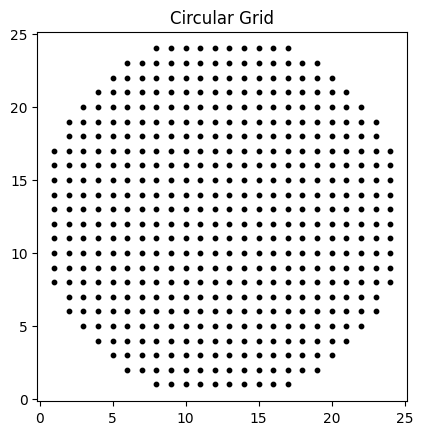

In [150]:



def laplacian_circle(n):
    """
    Create the Laplacian matrix for a circular grid with diameter n using finite difference method.
    :param n: Diameter of the circle (approximate number of points across the circle)
    :return: Sparse Laplacian matrix, grid points
    """
    
    # Generate circular grid points
    radius = n / 2
    points = []
    for i in range(n):
        for j in range(n):
            x, y = i - radius, j - radius
            if x**2 + y**2 <= radius**2:
                points.append((i, j))
    
    num_points = len(points)
    L = np.zeros((num_points, num_points))
    
    # Build Laplacian using finite differences
    point_indices = {point: idx for idx, point in enumerate(points)}
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 4-point stencil
    
    for (i, j), idx in point_indices.items():
        L[idx, idx] = -4
        for di, dj in directions:
            neighbor = (i + di, j + dj)
            if neighbor in point_indices:
                neighbor_idx = point_indices[neighbor]
                L[idx, neighbor_idx] = 1
    
    return sp.csr_matrix(L), points

def plot_grid(points):
    """Plot the circular grid."""
    x, y = zip(*points)
    plt.scatter(x, y, s=10, color='black')
    plt.gca().set_aspect('equal')
    plt.title("Circular Grid")
    plt.show()

# Example usage:
n = 25
laplacian, grid_points = laplacian_circle(n)
print(laplacian.toarray())
plot_grid(grid_points)
np.savetxt("circle_laplacian_points.txt", grid_points, fmt="%s", header="x, y", comments="")

np.savetxt("circle_laplacian_matrix.txt", laplacian.toarray(), fmt="%.2f", header="Laplacian Matrix", comments="")